# Determining intrinsic $P(k)$ from gridded data

[Jing 1995](http://adsabs.harvard.edu/abs/2005ApJ...620..559J) worked out how to determine the true power $P(k)$ from a gridded Fourier transform.

In [1]:
%matplotlib inline
from array_io import *
import numpy as np
import matplotlib.pyplot as plt
from read_grid_fft import *

36
2097152
(64, 64, 64)


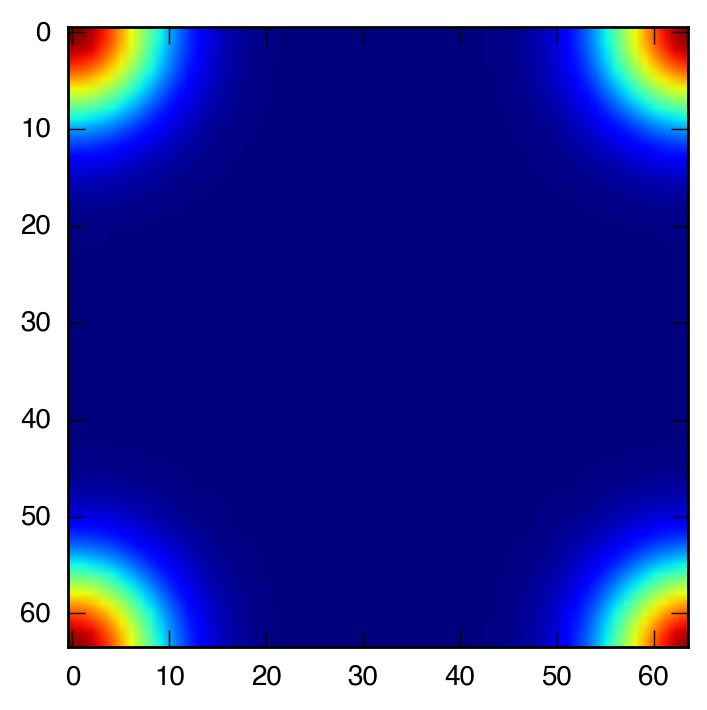

In [2]:
#Read in an ngp grid

idx = 0
fdir = "continuous/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

64
6.4


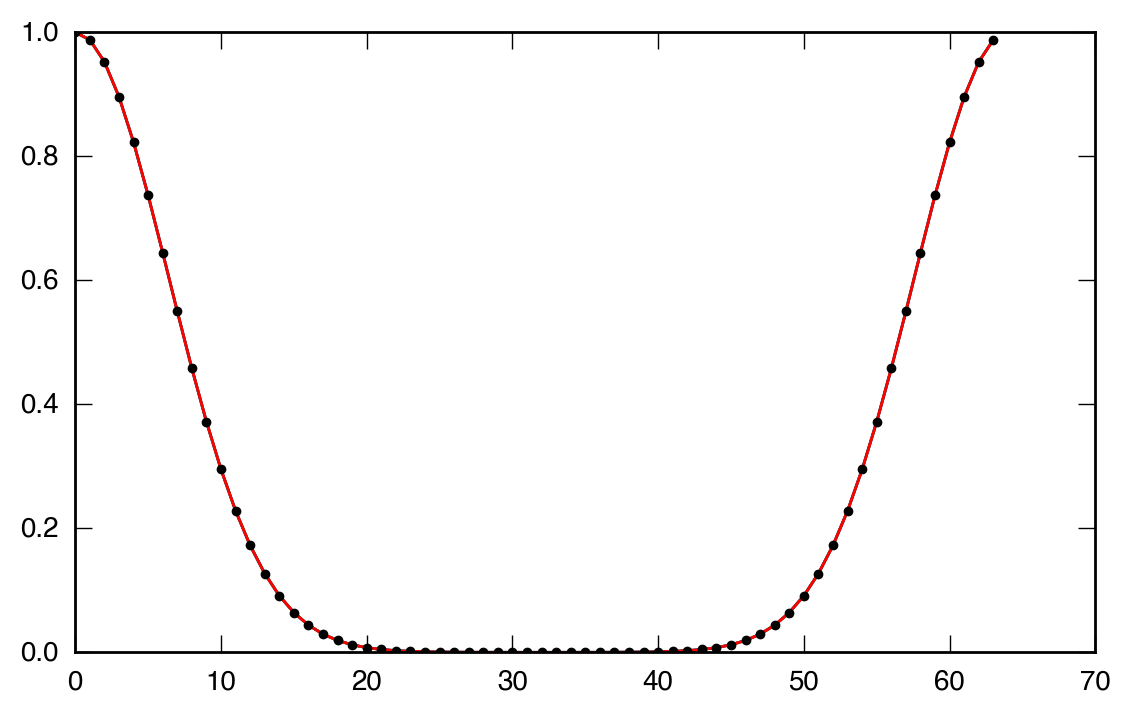

In [3]:
print nx
sigma = 0.1 * nx
print sigma
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

g = np.exp(-0.5*x**2 / sigma**2 )
g += np.exp(-0.5*(x-nx)**2 / sigma**2 )
plt.plot(x,g,'.',color='0')



36
2097152
(64, 64, 64)


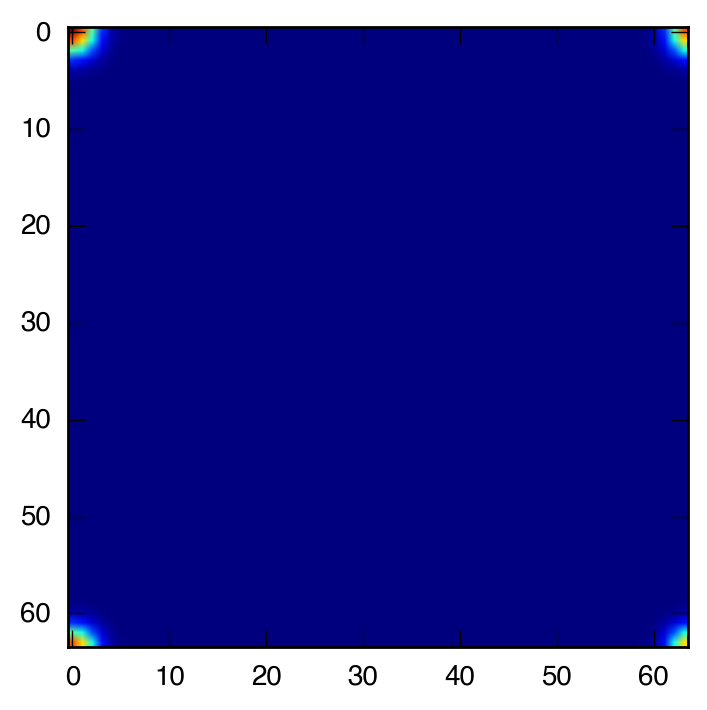

In [4]:
#Read in a delta^f_k grid

idx = 0
fdir = "continuous/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

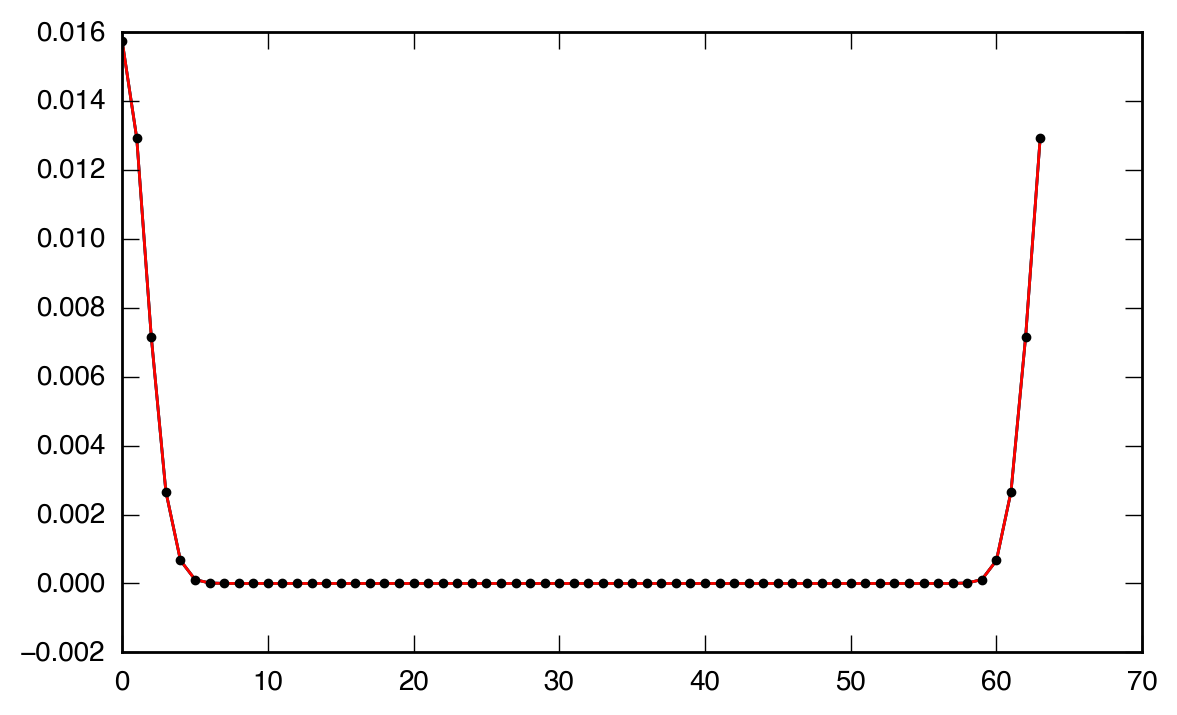

In [5]:

plt.plot(x,dfk[:,0,0])
plt.plot(x,dfk[0,:,0])
plt.plot(x,dfk[0,0,:])


a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
B = np.sqrt( np.pi / a)
g = B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
g += B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2
plt.plot(x,g,'.',color='0')



# Start of gridding

# Below I'm showing the particle positions

6.046278e-06 0.9999976
1.400952e-06 0.9999933
4.271631e-07 0.9999973


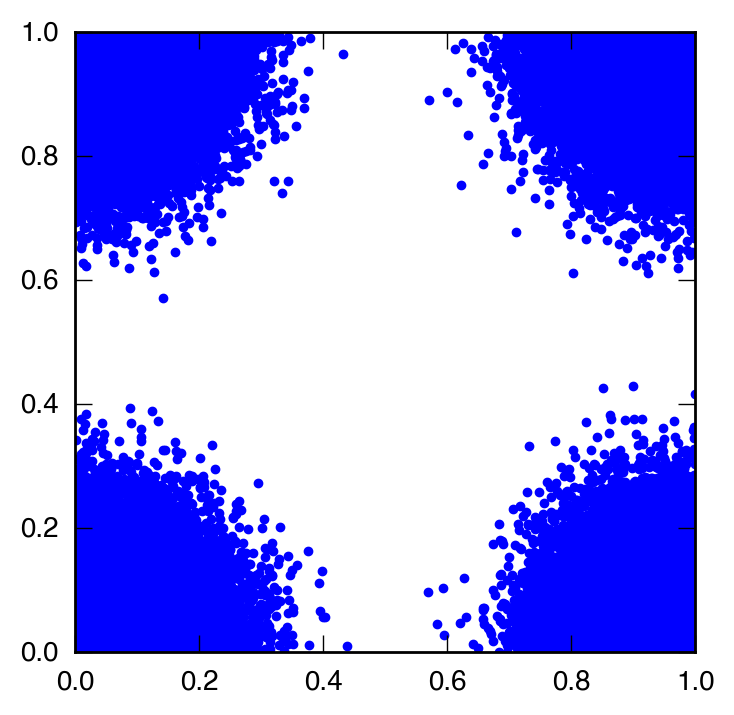

In [6]:
idx = 0
fdir = "particles/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.')
plt.axes().set_aspect('equal')
print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()
                    

# Below I'm showing the gridded particles

36
2097152
(64, 64, 64)


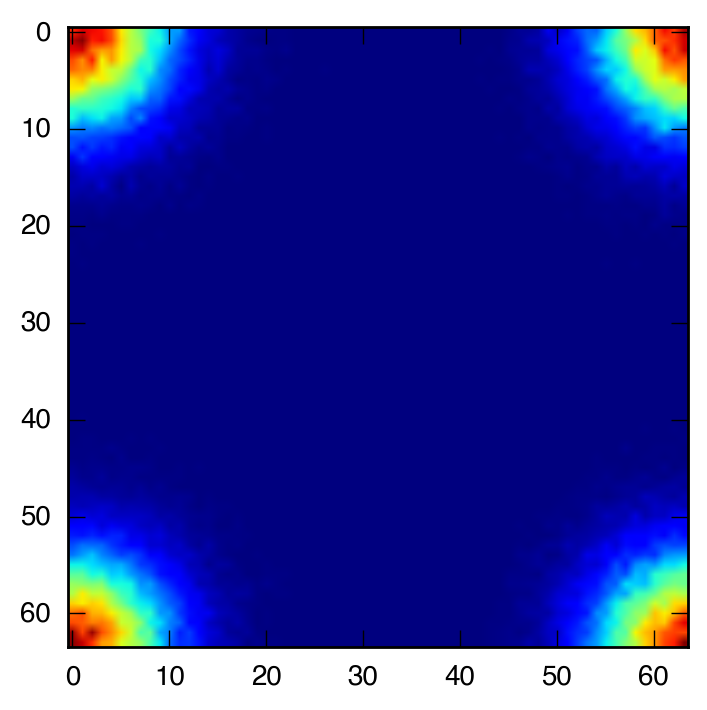

In [7]:
#Read in an ngp grid

idx = 0
fdir = "particles/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

64
6.4


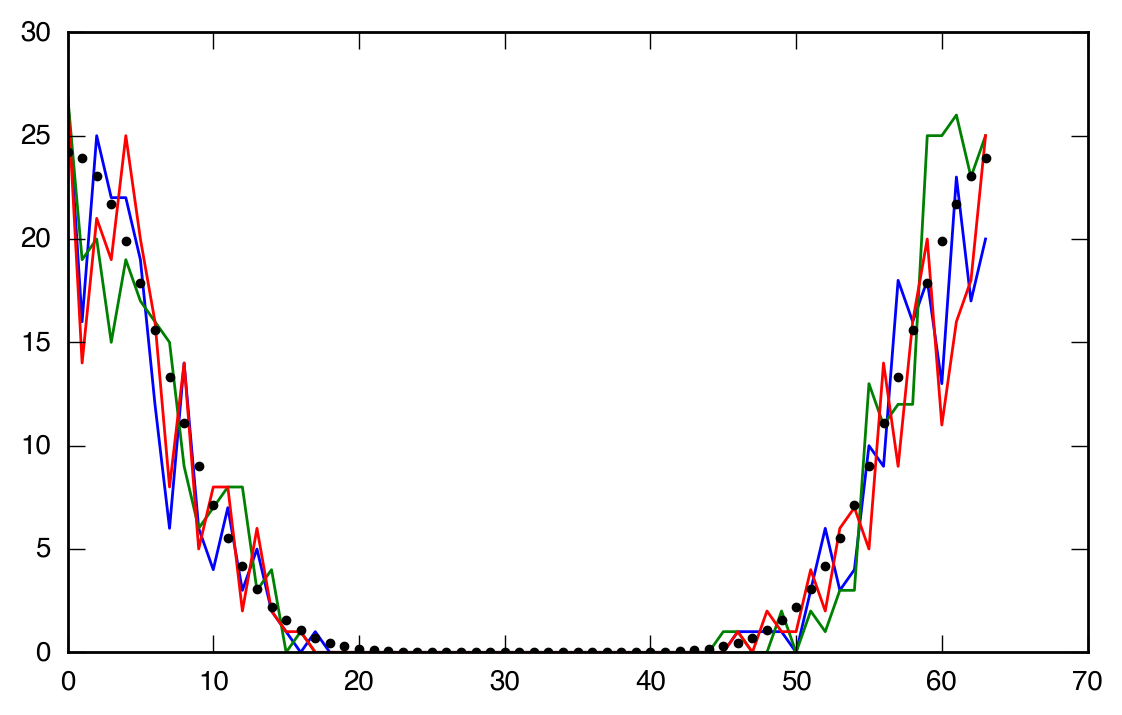

In [8]:

print nx
sigma = 0.1 * nx 
print sigma
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

A = N / (2.*np.pi*sigma**2)**1.5
g = A*np.exp(-0.5*x**2 / sigma**2 )
g += A*np.exp(-0.5*(x-nx)**2 / sigma**2 )
plt.plot(x,g,'.',color='0')

36
2097152
(64, 64, 64)


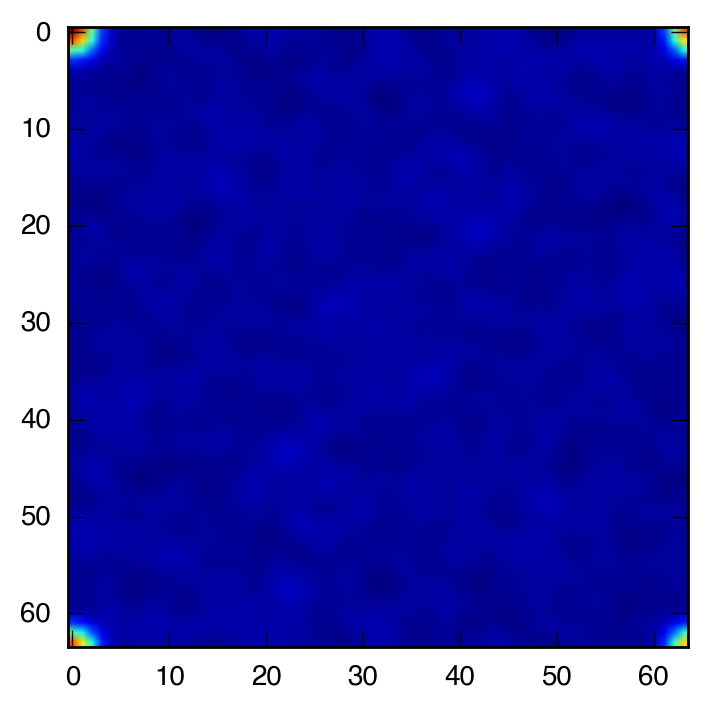

In [9]:
#Read in a delta^f_k grid

idx = 0
fdir = "particles/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

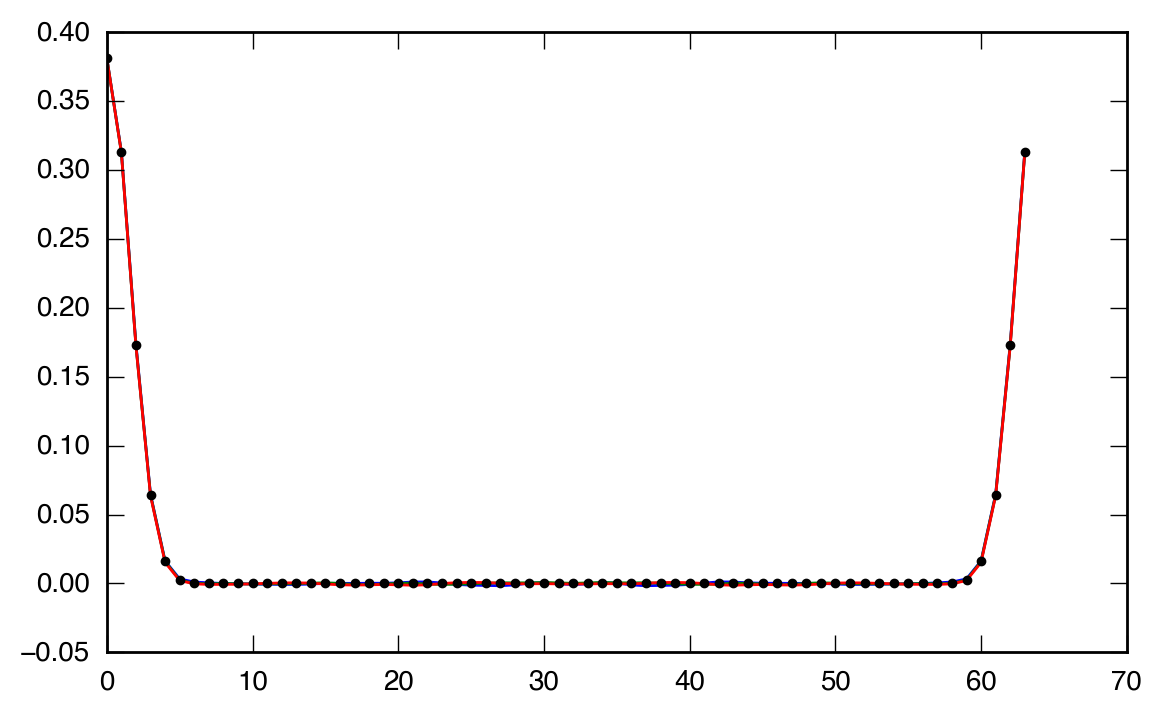

In [10]:
plt.plot(x,dfk[:,0,0])
plt.plot(x,dfk[0,:,0])
plt.plot(x,dfk[0,0,:])

sk = np.sqrt(2)*sigma
a = (float(nx)/(np.pi*sk))**2


A = N / (2.*np.pi*sigma**2)**1.5

a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
B = np.sqrt( np.pi / a)
g = A*B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
g += A*B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2

plt.plot(x,g,'.',color='0')



# Now a uniform grid of particles

36
2097152
(64, 64, 64)


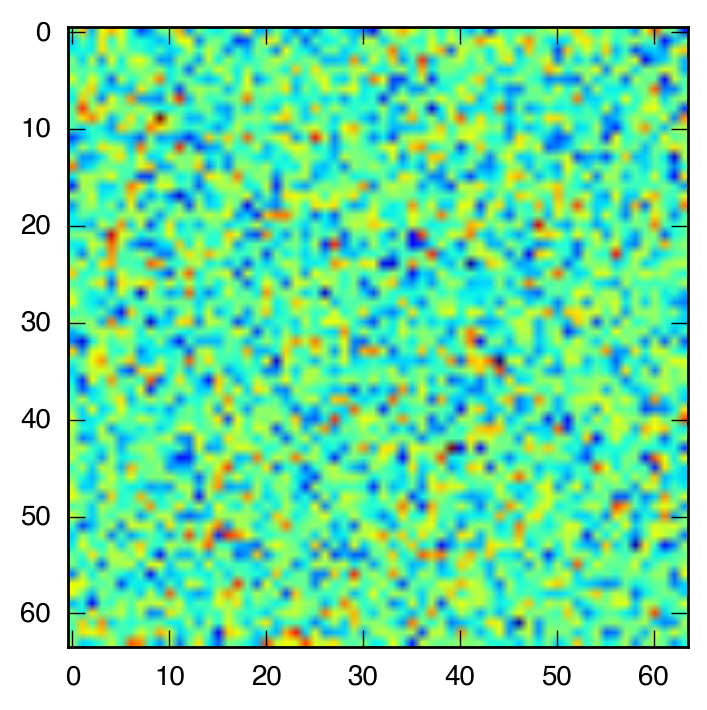

In [13]:
#Read in an ngp grid

idx = 0
fdir = "uniform/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

1.310837e-06 0.9999893
4.537869e-06 0.9999997
1.814775e-05 0.9999986


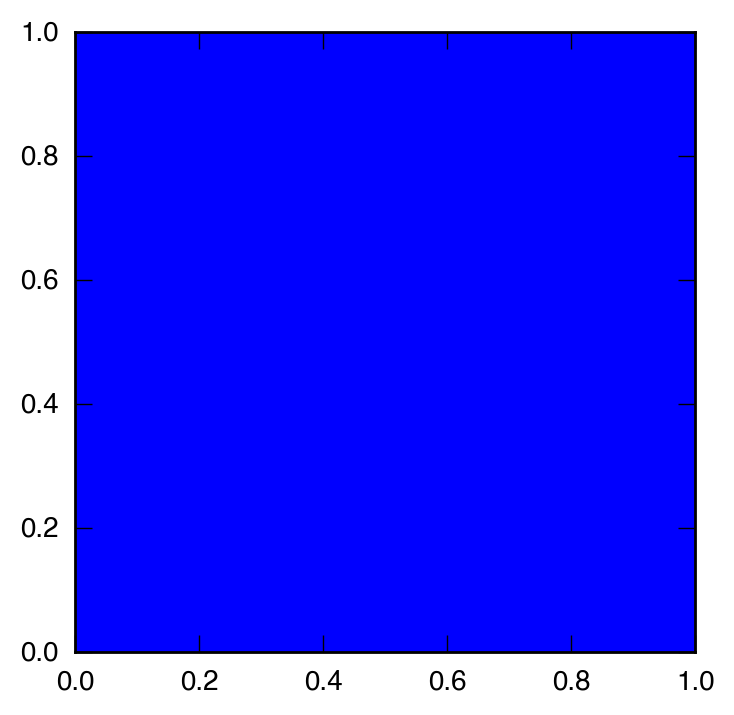

In [18]:
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.')
plt.axes().set_aspect('equal')
print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

64
6.4
0.381469726562


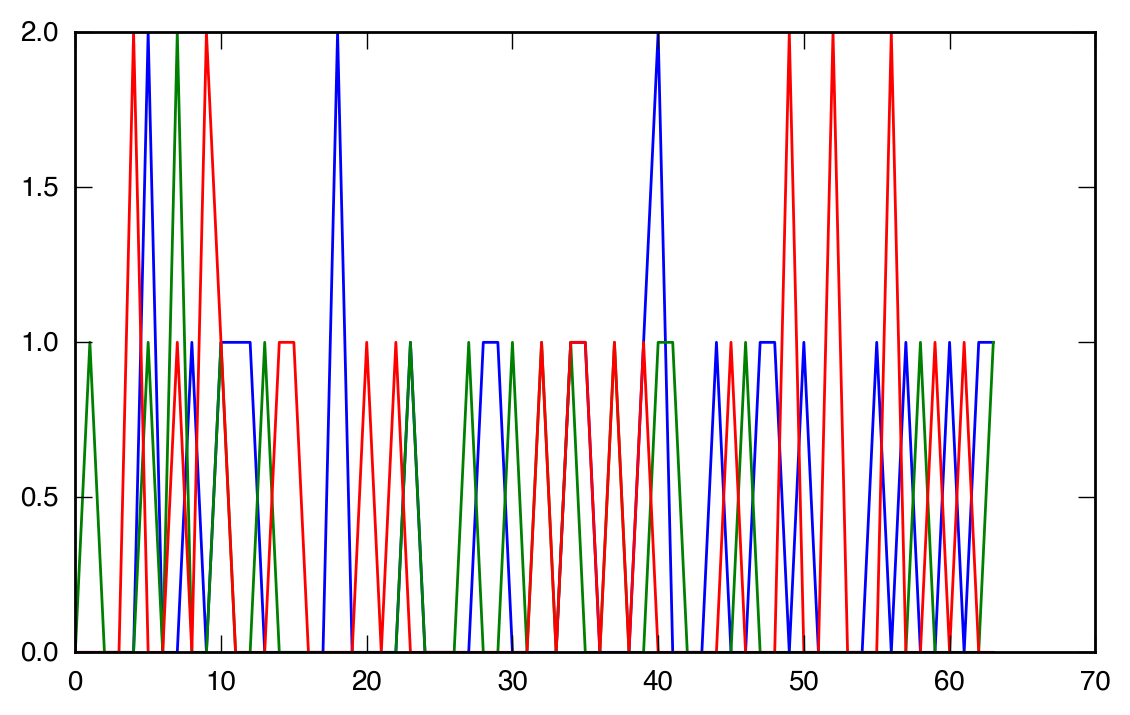

In [20]:

print nx
sigma = 0.1 * nx 
print sigma
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

A = N / float(nx*ny*nz)

print A

#A = N / (2.*np.pi*sigma**2)**1.5
#g = A*np.exp(-0.5*x**2 / sigma**2 )
#g += A*np.exp(-0.5*(x-nx)**2 / sigma**2 )
#plt.plot(x,g,'.',color='0')

36
2097152
(64, 64, 64)


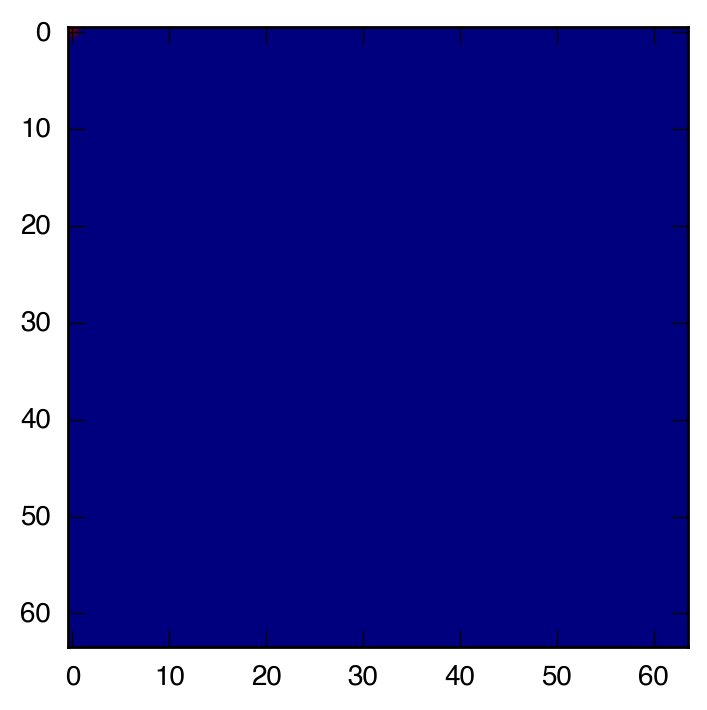

In [33]:
#Read in a delta^f_k grid

idx = 0
fdir = "uniform/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

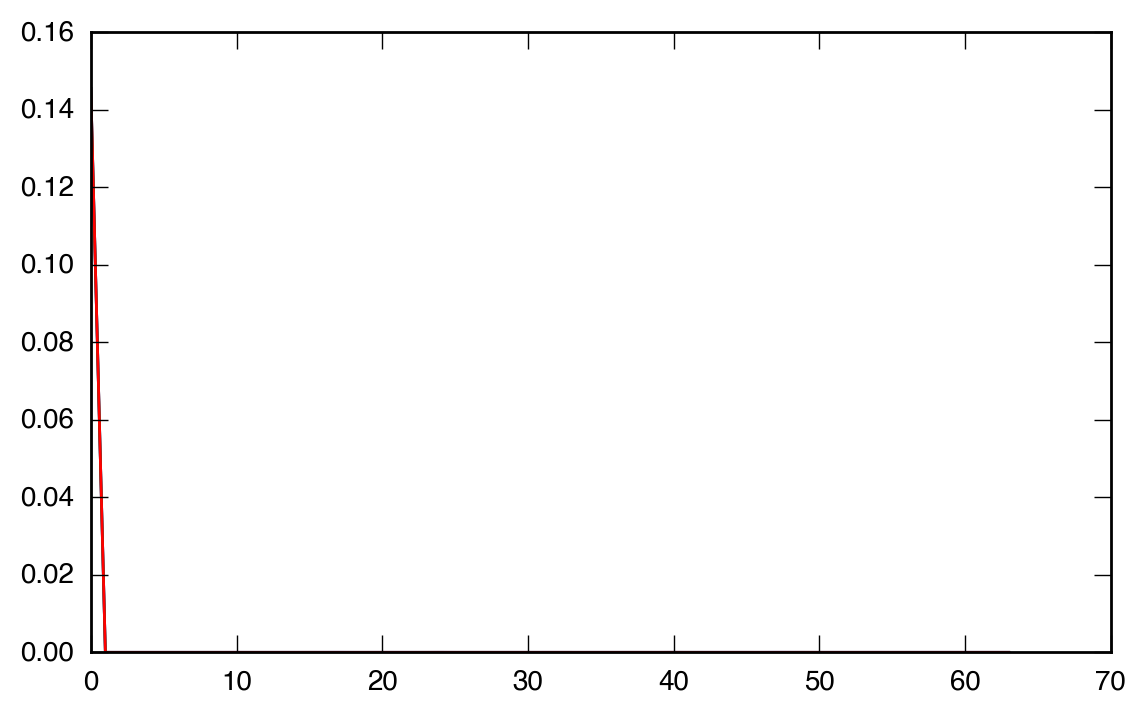

In [34]:
plt.plot(x,dfk[:,0,0])
plt.plot(x,dfk[0,:,0])
plt.plot(x,dfk[0,0,:])

#sk = np.sqrt(2)*sigma
#a = (float(nx)/(np.pi*sk))**2


#A = N / (2.*np.pi*sigma**2)**1.5

#a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
#B = np.sqrt( np.pi / a)
#g = A*B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
#g += A*B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2

#plt.plot(x,g,'.',color='0')



[  0.00000000e+00   2.86641724e-07   1.09130971e-07   1.66706731e-07
   2.94342360e-07   1.37365568e-07   4.70743254e-07   1.98114384e-07
   3.99444400e-07   1.17070858e-07   6.05724769e-07   1.20447307e-07
   4.37022587e-08   7.68662953e-08   5.37567932e-08   6.24656660e-07
   4.45178960e-07   1.66028660e-06   4.12355123e-08   1.88552009e-07
   3.22841901e-07   3.37983121e-07   3.00366775e-07   8.81717589e-07
   1.69218196e-06   8.68719837e-08   5.25041036e-07   5.30462495e-07
   1.71163955e-08   1.87720954e-07   6.80598421e-08   6.07206003e-08
   4.90479917e-07   6.07206003e-08   6.80598421e-08   1.87720954e-07
   1.71163955e-08   5.30462495e-07   5.25041036e-07   8.68719837e-08
   1.69218196e-06   8.81717589e-07   3.00366775e-07   3.37983121e-07
   3.22841901e-07   1.88552009e-07   4.12355123e-08   1.66028660e-06
   4.45178960e-07   6.24656660e-07   5.37567932e-08   7.68662953e-08
   4.37022587e-08   1.20447307e-07   6.05724769e-07   1.17070858e-07
   3.99444400e-07   1.98114384e-07

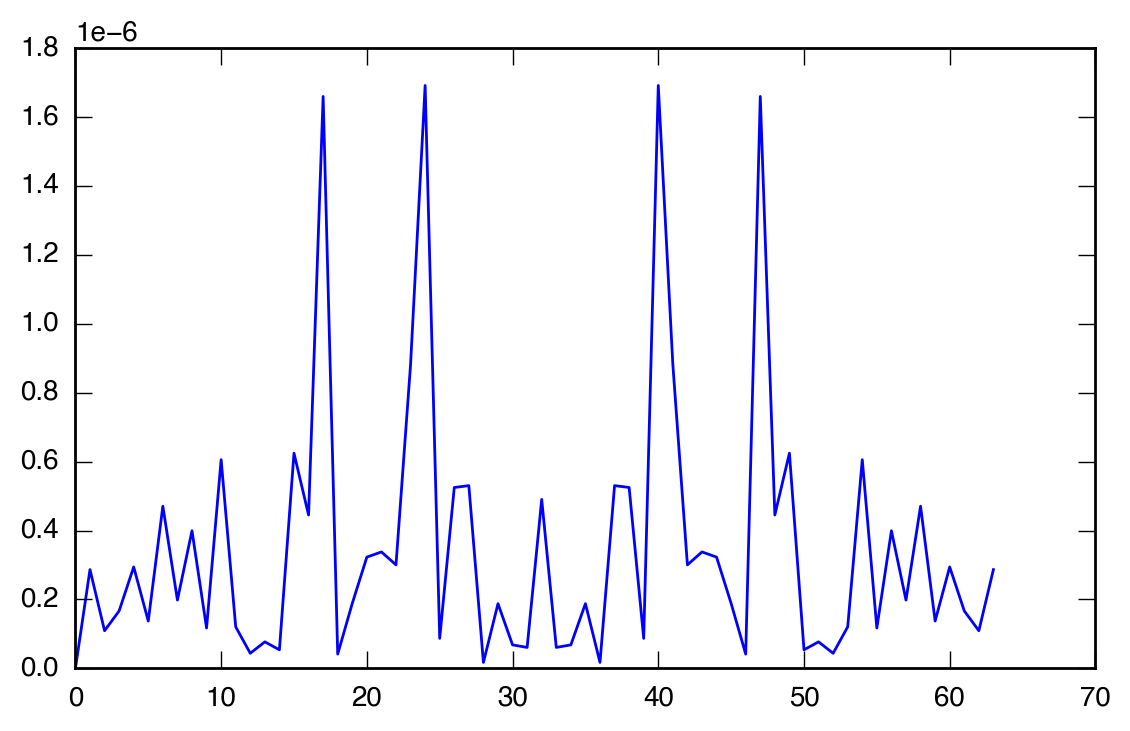

In [35]:
dfk_ave = np.zeros(nx)
for i in range(nx):
    dfk_ave[i] += dfk[i,0,0]*dfk[i,0,0]
    dfk_ave[i] += dfk[0,i,0]*dfk[0,i,0]
    dfk_ave[i] += dfk[0,0,i]*dfk[0,0,i]
    
dfk_ave[0] =0 

dfk_ave*=N/3.0

plt.plot(dfk_ave)

print(dfk_ave)
